Columns in DataFrame: ['Grade', 'Project', 'Case_ID', 'Gender', 'Age_at_diagnosis', 'Primary_Diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']
Missing values:
 Grade                 0
Gender                0
Race                  0
Age_at_diagnosis    862
dtype: int64


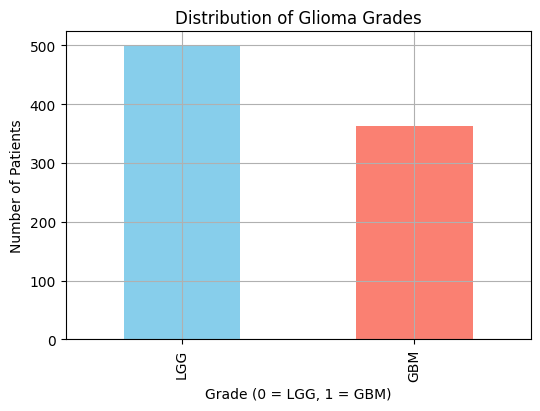

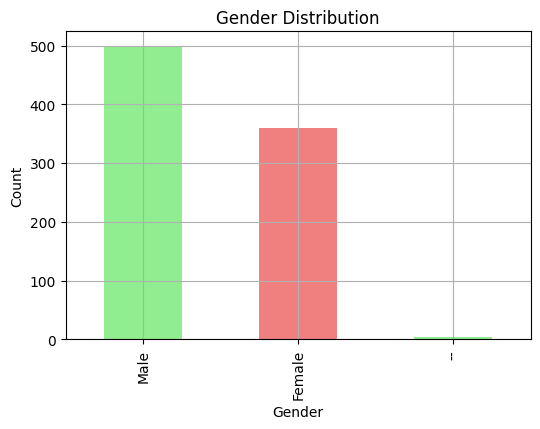

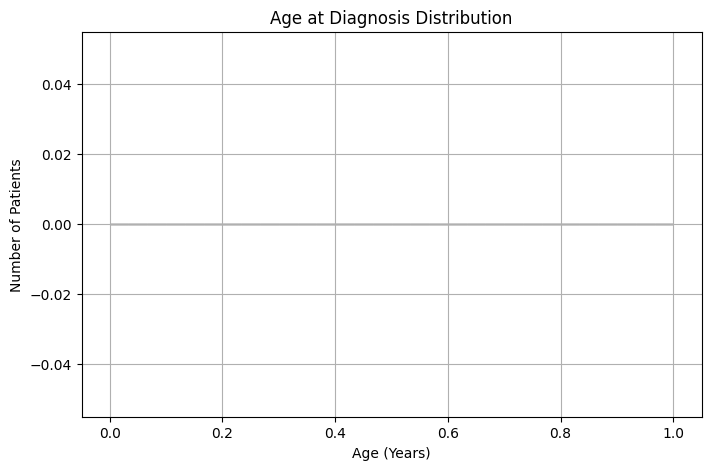

<Figure size 600x400 with 0 Axes>

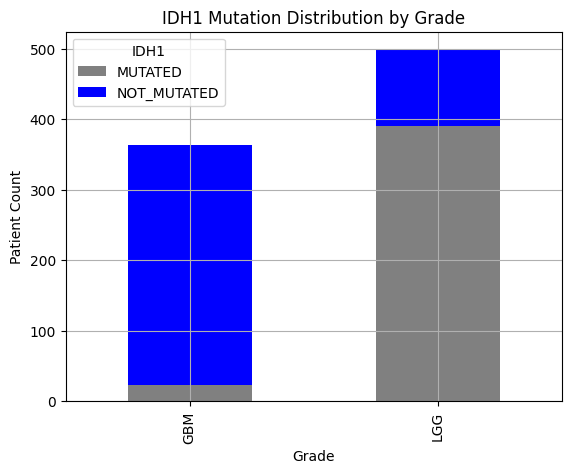

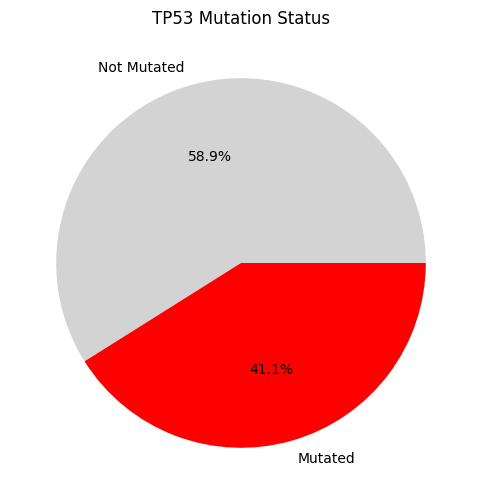

<Figure size 800x600 with 0 Axes>

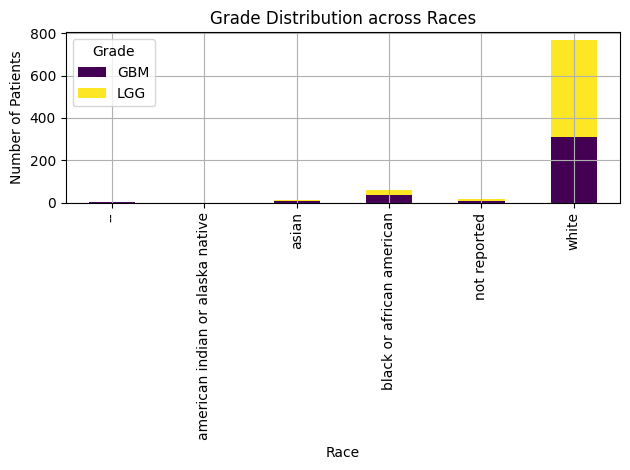

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset in Colab (assuming file is uploaded to session storage)
file_path = "TCGA_GBM_LGG_Mutations_all.csv"
df = pd.read_csv(file_path)

# Convert Age_at_diagnosis to numeric (assuming it's in days, as per earlier context)
df['Age_at_diagnosis'] = pd.to_numeric(df['Age_at_diagnosis'], errors='coerce') / 365  # Convert to years
# Verify columns exist and clean up data
print("Columns in DataFrame:", df.columns.tolist())
print("Missing values:\n", df[['Grade', 'Gender', 'Race', 'Age_at_diagnosis']].isna().sum())

# Objective 1: Count of GBM vs LGG
grade_counts = df['Grade'].value_counts()
plt.figure(figsize=(6, 4))
grade_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Glioma Grades')
plt.xlabel('Grade (0 = LGG, 1 = GBM)')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.show()

# Objective 2: Gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Gender Distribution')
plt.xlabel('Gender')  # Avoid hardcoding labels until we know encoding
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Objective 3: Age distribution
plt.figure(figsize=(8, 5))
plt.hist(df['Age_at_diagnosis'].dropna(), bins=30, color='lightblue', edgecolor='black')
plt.title('Age at Diagnosis Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.show()



# Objective 8: Mutation distribution for IDH1
idh1_dist = df.groupby(['Grade', 'IDH1']).size().unstack(fill_value=0)
plt.figure(figsize=(6, 4))
idh1_dist.plot(kind='bar', stacked=True, color=['grey', 'blue'])
plt.title('IDH1 Mutation Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Patient Count')
plt.grid(True)
plt.show()

# Objective 9: Pie chart of mutated vs not-mutated TP53
tp53_counts = df['TP53'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(tp53_counts, labels=['Not Mutated', 'Mutated'], autopct='%1.1f%%', colors=['lightgray', 'red'])
plt.title('TP53 Mutation Status')
plt.show()


# Objective 12: Race-wise grade distribution
race_grade = pd.crosstab(df['Race'], df['Grade'])
plt.figure(figsize=(8, 6))
race_grade.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Grade Distribution across Races')
plt.xlabel('Race')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.tight_layout()
plt.show()



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Load the dataset
df = pd.read_csv("TCGA_InfoWithGrade.csv")

# Verify data
print("Columns:", df.columns.tolist())
print("Data types:\n", df.dtypes)
print("Missing values:\n", df.isna().sum())

# Define mutation columns (20 genes)
mutation_cols = [
    'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1',
    'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA'
]

# Objective 1: Grade distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Grade', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Glioma Grades')
plt.xlabel('Grade (0 = LGG, 1 = GBM)')
plt.ylabel('Count')
plt.xticks([0, 1], ['LGG', 'GBM'])
plt.show()

# Objective 2: Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette=['#17becf', '#e377c2'])
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

# Objective 3: Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age_at_diagnosis'], bins=30, kde=True, color='#2ca02c')
plt.title('Age at Diagnosis Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

# Objective 4: Race distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Race', data=df, palette='Set2')
plt.title('Race Distribution')
plt.xlabel('Race (0 = White, 1 = Black, 2 = Asian, 3 = Native)')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['White', 'Black', 'Asian', 'Native'])
plt.show()

# Objective 5: Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df[['Age_at_diagnosis'] + mutation_cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Age and Mutation Features')
plt.show()

# Objective 6: Mutation count per gene
mutation_sums = df[mutation_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=mutation_sums.index, y=mutation_sums.values, palette='viridis')
plt.title('Mutation Frequency per Gene')
plt.xlabel('Gene')
plt.ylabel('Number of Mutations')
plt.xticks(rotation=90)
plt.show()

# Objective 7: Average age by grade
plt.figure(figsize=(8, 6))
sns.barplot(x='Grade', y='Age_at_diagnosis', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Average Age at Diagnosis by Grade')
plt.xlabel('Grade (0 = LGG, 1 = GBM)')
plt.ylabel('Average Age (Years)')
plt.xticks([0, 1], ['LGG', 'GBM'])
plt.show()

# Objective 8: IDH1 mutation by grade
idh1_grade = pd.crosstab(df['Grade'], df['IDH1'])
plt.figure(figsize=(8, 6))
idh1_grade.plot(kind='bar', stacked=True, color=['#7f7f7f', '#d62728'], ax=plt.gca())
plt.title('IDH1 Mutation Status by Grade')
plt.xlabel('Grade (0 = LGG, 1 = GBM)')
plt.ylabel('Count')
plt.xticks([0, 1], ['LGG', 'GBM'], rotation=0)
plt.legend(['Not Mutated', 'Mutated'])
plt.show()

# Objective 9: TP53 mutation distribution
tp53_counts = df['TP53'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(tp53_counts, labels=['Not Mutated', 'Mutated'], autopct='%1.1f%%', colors=['#ff9896', '#9467bd'])
plt.title('TP53 Mutation Distribution')
plt.show()

# Objective 10: Gene mutation comparison between GBM & LGG
gbm = df[df['Grade'] == 1][mutation_cols].mean()
lgg = df[df['Grade'] == 0][mutation_cols].mean()
plt.figure(figsize=(14, 6))
plt.plot(gbm.index, gbm.values, label='GBM', color='#ff7f0e', marker='o')
plt.plot(lgg.index, lgg.values, label='LGG', color='#1f77b4', marker='s')
plt.title('Gene Mutation Frequency: GBM vs LGG')
plt.xlabel('Gene')
plt.ylabel('Mutation Frequency (Proportion)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Objective 11: Gender-wise average age
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Age_at_diagnosis', data=df, palette=['#17becf', '#e377c2'])
plt.title('Average Age at Diagnosis by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Average Age (Years)')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

# Objective 12: Race-wise grade distribution
race_grade = pd.crosstab(df['Race'], df['Grade'])
plt.figure(figsize=(10, 6))
race_grade.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=plt.gca())
plt.title('Grade Distribution across Races')
plt.xlabel('Race (0 = White, 1 = Black, 2 = Asian, 3 = Native)')
plt.ylabel('Number of Patients')
plt.xticks([0, 1, 2, 3], ['White', 'Black', 'Asian', 'Native'], rotation=0)
plt.legend(['LGG', 'GBM'])
plt.show()

# New Graph 1: Box plot of age by grade
plt.figure(figsize=(8, 6))
sns.boxplot(x='Grade', y='Age_at_diagnosis', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Age Distribution by Glioma Grade')
plt.xlabel('Grade (0 = LGG, 1 = GBM)')
plt.ylabel('Age at Diagnosis (Years)')
plt.xticks([0, 1], ['LGG', 'GBM'])
plt.show()

# New Graph 2: Violin plot of mutation counts per patient
df['Mutation_Count'] = df[mutation_cols].sum(axis=1)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Grade', y='Mutation_Count', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Mutation Count Distribution per Patient by Grade')
plt.xlabel('Grade (0 = LGG, 1 = GBM)')
plt.ylabel('Number of Mutations')
plt.xticks([0, 1], ['LGG', 'GBM'])
plt.show()

# New Graph 3: Feature importance (using Random Forest)
X = df[['Age_at_diagnosis', 'Gender', 'Race'] + mutation_cols]
y = df['Grade']
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance.index, y=feature_importance.values, palette='magma')
plt.title('Feature Importance for Glioma Grading (Random Forest)')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# New Graph 4: Co-mutation heatmap
co_mutation = df[mutation_cols].T.dot(df[mutation_cols])
plt.figure(figsize=(12, 10))
sns.heatmap(co_mutation, cmap='YlGnBu', annot=False, square=True)
plt.title('Co-Mutation Heatmap of Genes')
plt.xlabel('Gene')
plt.ylabel('Gene')
plt.show()

ModuleNotFoundError: No module named 'sklearn'